<a href="https://colab.research.google.com/github/Azzoz-189/Landmark-Classification/blob/main/cnn_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Introduction

The project folder has the following structure:

* In the main directory you have this notebook, `cnn_from_scratch.ipynb`, that contains the instruction and some questions you will have to answer. Follow this notebook and complete the required sections in order.

* In the `src/` directory you have several source files. As instructed in this notebook, you will open and complete those files, then come back to this notebook to execute some tests that will verify what you have done. While these tests don't guarantee that your work is bug-free, they will help you finding the most obvious problems so you will be able to proceed to the next step with confidence.

* Sometimes you will need to restart the notebook. If you do so, remember to execute also the cells containing the code you have already completed starting from the top, before you move on.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

### Designing and training a CNN from scratch

In this notebook, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 50%.

Although 50% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="static_images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 50% is significantly better than random guessing, which would provide an accuracy of just 2% (100% / 50 classes). In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Experiment with different architectures, hyperparameters, training strategies, and trust your intuition.  And, of course, have fun!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly, download the data if you don't have it already, and also check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install requirements
!pip install -r /content/drive/MyDrive/AWS_Advanced/Project_3_docs/requirements.txt | grep -v 'already satisfied'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 41.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Important! After you have ran pip install, please restart the kernel using the **Kernel** menu

In [2]:
from helpers import setup_env

# If running locally, this will download dataset (make sure you have at
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
done


Computing std: 100%|████████████████████████| 6246/6246 [01:05<00:00, 94.71it/s]


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Data

In this and the following steps we are going to complete some code, and then execute some tests to make sure the code works as intended.

Open the file `src/data.py`. It contains a function called `get_data_loaders`. Read the function and complete all the parts marked by `YOUR CODE HERE`. Once you have finished, test that your implementation is correct by executing the following cell (see below for what to do if a test fails):

In [6]:
!pytest -vv data.py -k data_loaders

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.1.1, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items / 1 deselected / 3 selected                                                      

data.py::test_data_loaders_keys PASSED                                                       [ 33%]
data.py::test_data_loaders_output_type PASSED                                                [ 66%]
data.py::test_data_loaders_output_shape PASSED                                               [100%]

================================= 3 passed, 1 deselected in 1.35s ==================================


You should see something like:
```
src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 1.81s ========================
```
If all the tests are `PASSED`, you can move to the next section.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> **What to do if tests fail**
When a test fails, `pytest` will mark it as `FAILED` as opposed to `PASSED`, and will print a lot of useful output, including a message that should tell you what the problem is. For example, this is the output of a failed test:
> ```
>    def test_data_loaders_keys(data_loaders):
>    
>       assert set(data_loaders.keys()) == {"train", "valid", "test"}
E       AssertionError: assert {'tes', 'train', 'valid'} == {'test', 'train', 'valid'}
E         Extra items in the left set:
E         'tes'
E         Full diff:
E         - {'test', 'train', 'valid'}
E         + {'tes', 'train', 'valid'}
E         ?                          +++++++
>
> src/data.py:171: AssertionError
-------------- Captured stdout setup ----------------------------------------------
Reusing cached mean and std for landmark_images
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
=========== short test summary info ===============================================
FAILED src/data.py::test_data_loaders_keys - AssertionError: The keys of the data_loaders dictionary should be train, valid and test
> ```
> In the `short test summary info` you can see a short description of the problem. In this case, the dictionary we are returning has the wrong keys. Going above a little, you can see that the test expects `{'test', 'train', 'valid'}` while we are returning `{'tes', 'train', 'valid'}` (there is a missing `t`). So we can go back to our function, fix that problem and test again.
>
> In other cases, you might get an error like:
> ```
    def _conv_forward(self, input: Tensor, weight: Tensor, bias: Optional[Tensor]):
        if self.padding_mode != 'zeros':
            return F.conv2d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
                            weight, bias, self.stride,
                            _pair(0), self.dilation, self.groups)
        return F.conv2d(input, weight, bias, self.stride,
>                       self.padding, self.dilation, self.groups)
E       RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same
>
> ../../../../miniconda3/envs/udacity_starter/lib/python3.7/site-packages/torch/nn/modules/conv.py:440: RuntimeError
> ```
> Looking at the stack trace you should be able to understand what it is going on. In this case, we forgot to add a `.cuda()` to some tensor. For example, the model is on the GPU, but the data aren't.

You should see something like:
```
src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 1.81s ========================
```
If all the tests are `PASSED`, you can move to the next section.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> **What to do if tests fail**
When a test fails, `pytest` will mark it as `FAILED` as opposed to `PASSED`, and will print a lot of useful output, including a message that should tell you what the problem is. For example, this is the output of a failed test:
> ```
>    def test_data_loaders_keys(data_loaders):
>    
>       assert set(data_loaders.keys()) == {"train", "valid", "test"}
E       AssertionError: assert {'tes', 'train', 'valid'} == {'test', 'train', 'valid'}
E         Extra items in the left set:
E         'tes'
E         Full diff:
E         - {'test', 'train', 'valid'}
E         + {'tes', 'train', 'valid'}
E         ?                          +++++++
>
> src/data.py:171: AssertionError
-------------- Captured stdout setup ----------------------------------------------
Reusing cached mean and std for landmark_images
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
=========== short test summary info ===============================================
FAILED src/data.py::test_data_loaders_keys - AssertionError: The keys of the data_loaders dictionary should be train, valid and test
> ```
> In the `short test summary info` you can see a short description of the problem. In this case, the dictionary we are returning has the wrong keys. Going above a little, you can see that the test expects `{'test', 'train', 'valid'}` while we are returning `{'tes', 'train', 'valid'}` (there is a missing `t`). So we can go back to our function, fix that problem and test again.
>
> In other cases, you might get an error like:
> ```
    def _conv_forward(self, input: Tensor, weight: Tensor, bias: Optional[Tensor]):
        if self.padding_mode != 'zeros':
            return F.conv2d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
                            weight, bias, self.stride,
                            _pair(0), self.dilation, self.groups)
        return F.conv2d(input, weight, bias, self.stride,
>                       self.padding, self.dilation, self.groups)
E       RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same
>
> ../../../../miniconda3/envs/udacity_starter/lib/python3.7/site-packages/torch/nn/modules/conv.py:440: RuntimeError
> ```
> Looking at the stack trace you should be able to understand what it is going on. In this case, we forgot to add a `.cuda()` to some tensor. For example, the model is on the GPU, but the data aren't.

You should see something like:
```
src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 1.81s ========================
```
If all the tests are `PASSED`, you can move to the next section.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> **What to do if tests fail**
When a test fails, `pytest` will mark it as `FAILED` as opposed to `PASSED`, and will print a lot of useful output, including a message that should tell you what the problem is. For example, this is the output of a failed test:
> ```
>    def test_data_loaders_keys(data_loaders):
>    
>       assert set(data_loaders.keys()) == {"train", "valid", "test"}
E       AssertionError: assert {'tes', 'train', 'valid'} == {'test', 'train', 'valid'}
E         Extra items in the left set:
E         'tes'
E         Full diff:
E         - {'test', 'train', 'valid'}
E         + {'tes', 'train', 'valid'}
E         ?                          +++++++
>
> src/data.py:171: AssertionError
-------------- Captured stdout setup ----------------------------------------------
Reusing cached mean and std for landmark_images
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
=========== short test summary info ===============================================
FAILED src/data.py::test_data_loaders_keys - AssertionError: The keys of the data_loaders dictionary should be train, valid and test
> ```
> In the `short test summary info` you can see a short description of the problem. In this case, the dictionary we are returning has the wrong keys. Going above a little, you can see that the test expects `{'test', 'train', 'valid'}` while we are returning `{'tes', 'train', 'valid'}` (there is a missing `t`). So we can go back to our function, fix that problem and test again.
>
> In other cases, you might get an error like:
> ```
    def _conv_forward(self, input: Tensor, weight: Tensor, bias: Optional[Tensor]):
        if self.padding_mode != 'zeros':
            return F.conv2d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
                            weight, bias, self.stride,
                            _pair(0), self.dilation, self.groups)
        return F.conv2d(input, weight, bias, self.stride,
>                       self.padding, self.dilation, self.groups)
E       RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same
>
> ../../../../miniconda3/envs/udacity_starter/lib/python3.7/site-packages/torch/nn/modules/conv.py:440: RuntimeError
> ```
> Looking at the stack trace you should be able to understand what it is going on. In this case, we forgot to add a `.cuda()` to some tensor. For example, the model is on the GPU, but the data aren't.

You should see something like:
```
src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 1.81s ========================
```
If all the tests are `PASSED`, you can move to the next section.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> **What to do if tests fail**
When a test fails, `pytest` will mark it as `FAILED` as opposed to `PASSED`, and will print a lot of useful output, including a message that should tell you what the problem is. For example, this is the output of a failed test:
> ```
>    def test_data_loaders_keys(data_loaders):
>    
>       assert set(data_loaders.keys()) == {"train", "valid", "test"}
E       AssertionError: assert {'tes', 'train', 'valid'} == {'test', 'train', 'valid'}
E         Extra items in the left set:
E         'tes'
E         Full diff:
E         - {'test', 'train', 'valid'}
E         + {'tes', 'train', 'valid'}
E         ?                          +++++++
>
> src/data.py:171: AssertionError
-------------- Captured stdout setup ----------------------------------------------
Reusing cached mean and std for landmark_images
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
=========== short test summary info ===============================================
FAILED src/data.py::test_data_loaders_keys - AssertionError: The keys of the data_loaders dictionary should be train, valid and test
> ```
> In the `short test summary info` you can see a short description of the problem. In this case, the dictionary we are returning has the wrong keys. Going above a little, you can see that the test expects `{'test', 'train', 'valid'}` while we are returning `{'tes', 'train', 'valid'}` (there is a missing `t`). So we can go back to our function, fix that problem and test again.
>
> In other cases, you might get an error like:
> ```
    def _conv_forward(self, input: Tensor, weight: Tensor, bias: Optional[Tensor]):
        if self.padding_mode != 'zeros':
            return F.conv2d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
                            weight, bias, self.stride,
                            _pair(0), self.dilation, self.groups)
        return F.conv2d(input, weight, bias, self.stride,
>                       self.padding, self.dilation, self.groups)
E       RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same
>
> ../../../../miniconda3/envs/udacity_starter/lib/python3.7/site-packages/torch/nn/modules/conv.py:440: RuntimeError
> ```
> Looking at the stack trace you should be able to understand what it is going on. In this case, we forgot to add a `.cuda()` to some tensor. For example, the model is on the GPU, but the data aren't.

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> **Question:** Describe your chosen procedure for preprocessing the data.
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/> **Answer**:

- First resize to 256, then random crop to 244; as tensors returned by dataloaders should be 224x224.
- Yes, first random rotation by 30 deg, then random horizontal flip; and that is because of the nature of landmark images on the nature which sometimes come unusal shape, like inclined, so close or so far in the image, somehow located at the corner of the image, so that like these augmentation makes it easier for the model to recognize them.

### Visualize a Batch of Training Data

Go back to `src/data.py` and complete the function `visualize_one_batch` in all places with the `YOUR CODE HERE` marker. After you're done, execute the following cell and make sure the test `src/data.py::test_visualize_one_batch` is `PASSED`:

In [ ]:
!pytest -vv data.py -k visualize_one_batch

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.1.1, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                                      

data.py::test_visualize_one_batch PASSED                                                     [100%]

================================= 1 passed, 3 deselected in 2.09s ==================================


We can now use the code we just completed to get a batch of images from your train data loader and look at them.

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing (including transforms such as rotations, translations, color transforms...) are working as expected.

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
Reusing cached mean and std


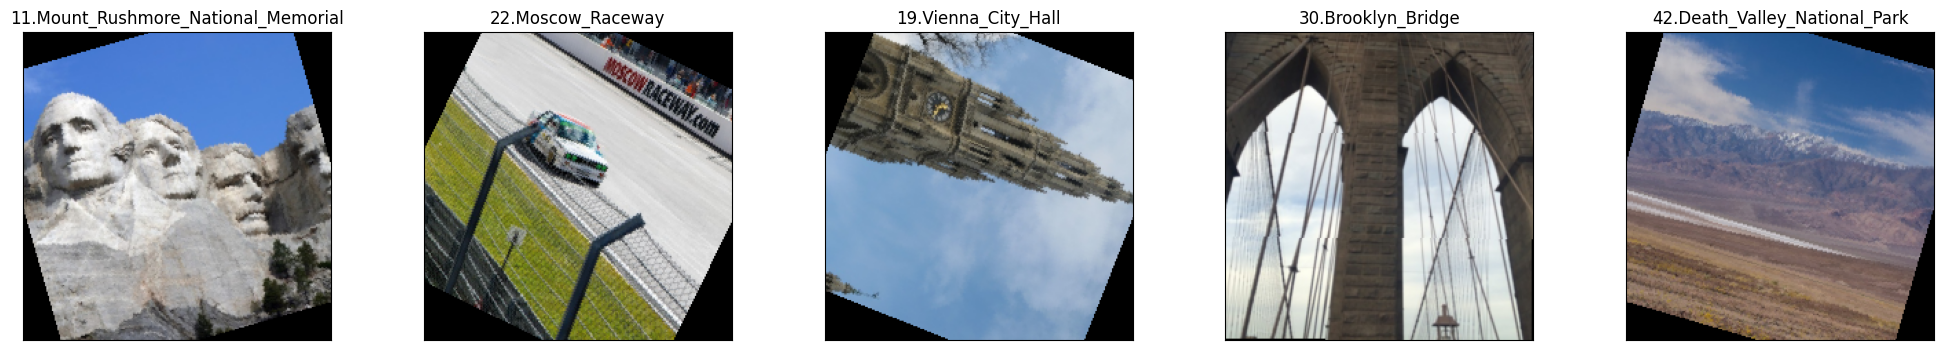

In [8]:
%matplotlib inline
from data import visualize_one_batch, get_data_loaders

# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=-1 (all CPUs)
data_loaders = get_data_loaders(batch_size=5, valid_size=0.01,num_workers=1)# YOUR CODE HERE

visualize_one_batch(data_loaders)

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Define model

Open `src/model.py` and complete the `MyModel` class filling in all the `YOUR CODE HERE` sections. After you're done, execute the following test and make sure it passes:

In [ ]:
!pytest -vv model.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.1.1, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 1 item                                                                                   

model.py::test_model_construction PASSED                                                     [100%]

======================================== 1 passed in 2.58s =========================================


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> **Question**: Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/> __Answer:__

- Dividing the model architecture into two parts *`Backbone`* and *`Head`*, so that know the type of functions and methods required efficiently.


- In the backbone part, I made `3-Stages Convolution layers` as the input for first is 3-channels, then making outputs or `feature map of 16 -> 32 -> 128`, followed by `BatchNorm`, `ReLU-Activation`, then `MaxPooling` for halfing the size of the input image from `224x224` til `14x14` and making deeper and deeper features maps from 3 to 128 filters for better feature extraction.


- Then, establishing the head part with `One-Hidden layer`, followed by `Dropout` method, then `ReLU-Activation`, and `One-Output` layer with `num_of_classes as its output` units without putting activation function as we could use the `CrossEntropyLoss`-function preferred for multiclss classifications which is concluded with log_softmax activation for output.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: define loss and optimizer

Open `src/optimization.py` and complete the `get_loss` function, then execute the test and make sure it passes:

In [ ]:
!pytest -vv optimization.py -k get_loss

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.1.1, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 7 items / 6 deselected / 1 selected                                                      

optimization.py::test_get_loss PASSED                                                        [100%]

================================= 1 passed, 6 deselected in 0.81s ==================================


Then, in the same file, complete the `get_optimizer` function then execute its tests, and make sure they all pass:

In [ ]:
!pytest -vv optimization.py -k get_optimizer

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.1.1, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 7 items / 1 deselected / 6 selected                                                      

optimization.py::test_get_optimizer_type PASSED                                              [ 16%]
optimization.py::test_get_optimizer_is_linked_with_model PASSED                              [ 33%]
optimization.py::test_get_optimizer_returns_adam PASSED                                      [ 50%]
optimization.py::test_get_optimizer_sets_learning_rate PASSED                                [ 66%]
optimization.py::test_get_optimizer_sets_momentum PASSED                                     [ 83%]
optimization.py::test_get_optimizer_sets_weight_decat PASSED                                 [100%]

================================= 6 passed, 1 deselec

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Train and Validate the Model

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Testing ML code is notoriously difficult. The tests in this section merely exercise the functions you are completing, so it will help you catching glaring problems but it won't guarantee that your training code is bug-free. If you see that your loss is not decreasing, for example, that's a sign of a bug or of a flawed model design. Use your judgement.

Open `src/train.py` and complete the `train_one_epoch` function, then run the tests:

In [ ]:
!pytest -vv train.py -k train_one_epoch

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.1.1, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                                      

train.py::test_train_one_epoch PASSED                                                        [100%]

================================= 1 passed, 3 deselected in 33.87s =================================


Now complete the `valid` function, then run the tests:

In [ ]:
!pytest -vv train.py -k valid_one_epoch

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.1.1, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                                      

train.py::test_valid_one_epoch PASSED                                                        [100%]

================================= 1 passed, 3 deselected in 16.32s =================================


Now complete the `optimize` function, then run the tests:

In [ ]:
!pytest -vv train.py -k optimize

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.1.1, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                                      

train.py::test_optimize PASSED                                                               [100%]

================================= 1 passed, 3 deselected in 46.15s =================================


Finally, complete the `test` function then run the tests:

In [ ]:
!pytest -vv train.py -k one_epoch_test

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.1.1, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                                      

train.py::test_one_epoch_test PASSED                                                         [100%]

================================= 1 passed, 3 deselected in 17.06s =================================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 5: Putting everything together

Allright, good job getting here! Now it's time to see if all our hard work pays off. In the following cell we will train your model and validate it against the validation set.

Let's start by defining a few hyperparameters. Feel free to experiment with different values and try to optimize your model:

In [9]:
batch_size = 64        # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
num_epochs = 50        # number of epochs for training
num_classes = 50       # number of classes. Do not change this
dropout = 0.4         # dropout for our model
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.0    # regularization. Increase this to combat overfitting
momentum=0.8

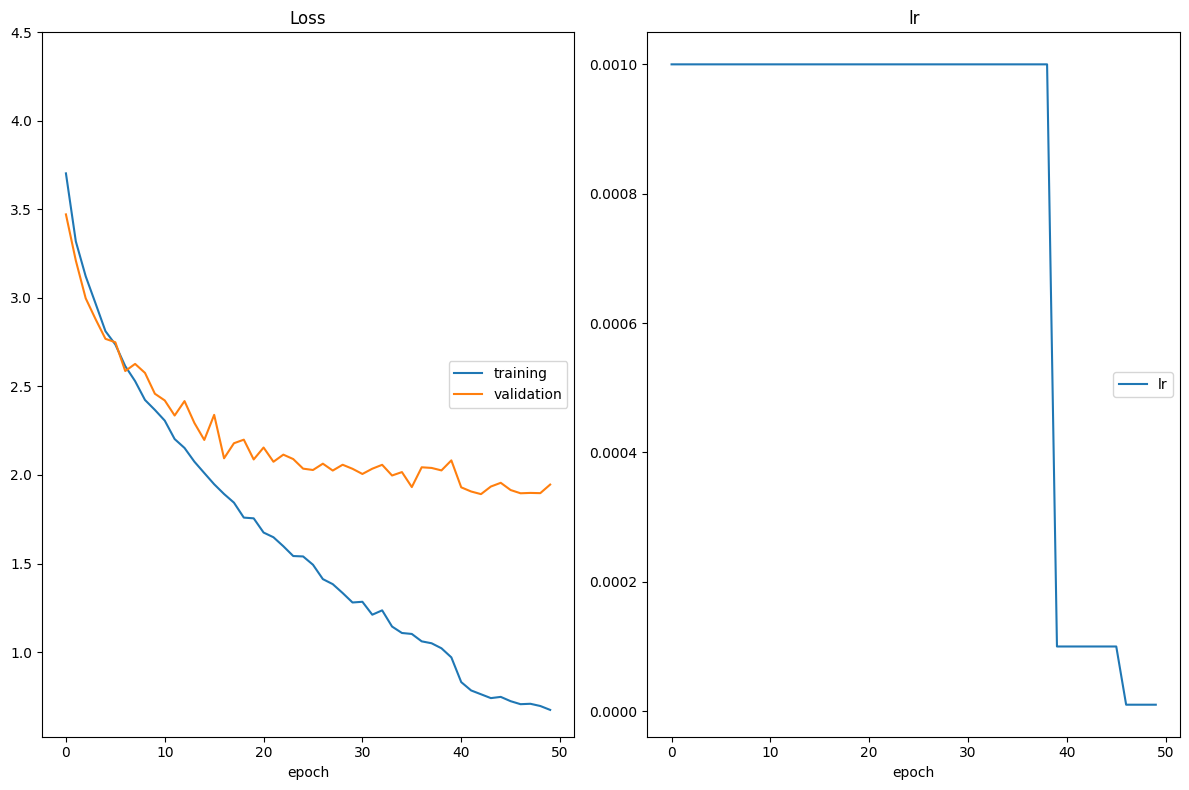

In [10]:
from data import get_data_loaders
from train import optimize
from optimization import get_optimizer, get_loss
from model import MyModel

# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)# YOUR CODE HERE

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel(num_classes=num_classes, dropout=dropout)# YOUR CODE HERE

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell
optimizer = get_optimizer(model=model, learning_rate=learning_rate,optimizer=opt, weight_decay=weight_decay,momentum=momentum)# YOUR CODE HERE

# Get the loss using get_loss
loss = get_loss()# YOUR CODE HERE

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="/content/drive/MyDrive/AWS_Advanced/Project_3_docs/checkpoints/best_val_loss.pt",
    interactive_tracking=True
)

In [ ]:
#___________________Customizing Optimize function so that,______________
#___________________become capable for fine-Tuning with _______________`Optuna` framework:

import tempfile

import torch
import numpy as np
from livelossplot import PlotLosses
from livelossplot.outputs import MatplotlibPlot
from tqdm import tqdm
from helpers import after_subplot

def train_one_epoch(train_dataloader, model, optimizer, loss):
    """
    Performs one train_one_epoch epoch
    """

    if torch.cuda.is_available():
        # YOUR CODE HERE: transfer the model to the GPU
        # HINT: use .cuda()
        model.cuda()

    # YOUR CODE HERE: set the model to training mode
    model.train()
    train_loss = 0.0

    for batch_idx, (data, target) in tqdm(
        enumerate(train_dataloader),
        desc="Training",
        total=len(train_dataloader),
        leave=True,
        ncols=80,
    ):
        # move data to GPU
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

        # 1. clear the gradients of all optimized variables
        # YOUR CODE HERE:
        optimizer.zero_grad()
        # 2. forward pass: compute predicted outputs by passing inputs to the model
        output  = model(data)# YOUR CODE HERE
        # 3. calculate the loss
        loss_value  = loss(output, target)# YOUR CODE HERE
        # 4. backward pass: compute gradient of the loss with respect to model parameters
        # YOUR CODE HERE:
        loss_value.backward()
        # 5. perform a single optimization step (parameter update)
        # YOUR CODE HERE:
        optimizer.step()
        # update average training loss
        train_loss = train_loss + (
            (1 / (batch_idx + 1)) * (loss_value.data.item() - train_loss)
        )

    return train_loss


def valid_one_epoch(valid_dataloader, model, loss):
    """
    Validate at the end of one epoch
    """

    with torch.no_grad():

        # set the model to evaluation mode
        # YOUR CODE HERE
        model.eval()
        if torch.cuda.is_available():
            model.cuda()

        valid_loss = 0.0
        for batch_idx, (data, target) in tqdm(
            enumerate(valid_dataloader),
            desc="Validating",
            total=len(valid_dataloader),
            leave=True,
            ncols=80,
        ):
            # move data to GPU
            if torch.cuda.is_available():
                data, target = data.cuda(), target.cuda()

            # 1. forward pass: compute predicted outputs by passing inputs to the model
            output  = model(data)# YOUR CODE HERE
            # 2. calculate the loss
            loss_value  = loss(output, target)# YOUR CODE HERE

            # Calculate average validation loss
            valid_loss = valid_loss + (
                (1 / (batch_idx + 1)) * (loss_value.data.item() - valid_loss)
            )

    return valid_loss


def optimize_fiTu_v1(data_loaders, model, optimizer, loss, n_epochs, save_path, interactive_tracking=False):
    # initialize tracker for minimum validation loss
    if interactive_tracking:
        liveloss = PlotLosses(outputs=[MatplotlibPlot(after_subplot=after_subplot)])
    else:
        liveloss = None

    valid_loss_min = None

    valid_loss_histor = []
    for epoch in range(1, n_epochs + 1):

        train_loss = train_one_epoch(
            data_loaders["train"], model, optimizer, loss
        )

        valid_loss = valid_one_epoch(data_loaders["valid"], model, loss)
        valid_loss_histor.append(valid_loss)
        # print training/validation statistics
        print(
            "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
                epoch, train_loss, valid_loss
            )
        )

        # If the validation loss decreases by more than 1%, save the model
        if valid_loss_min is None or (
                (valid_loss_min - valid_loss) / valid_loss_min > 0.01
        ):
            print(f"New minimum validation loss: {valid_loss:.6f}. Saving model ...")

            # Save the weights to save_path
            # YOUR CODE HERE
            torch.save(model.state_dict(),save_path)

            valid_loss_min = valid_loss

    return sum(valid_loss_histor) / len(valid_loss_histor)

### ---> Fine Tune using Optuna with `Customized Optimize` function:

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.5 MB/s eta 0:00:00


In [ ]:
from data import get_data_loaders
from train import optimize
from optimization import get_optimizer, get_loss
from model import MyModel
import optuna
def optime_model(trial):
    # Define the hyperparameters to search over

    DropOut = trial.suggest_float("dropOut", 0.1, 0.5)

    lr= trial.suggest_float("lr", 0.0001, 0.1)


    #batches = trial.suggest_int('batches', 4,64)

    epoch=trial.suggest_int("epoch", 10, 30)

    #weight_decay = trial.suggest_float("weight_decay", 0.0,0.9)

    momentum=trial.suggest_float("momentum", 0.1, 0.9)

    optimizer_name =trial.suggest_categorical("optimizer", ["Adam","SGD"])

    # Create the model
    valid_size = 0.2
    num_classes = 50       # number of classes. Do not change this
    model = MyModel(num_classes=num_classes, dropout=DropOut)

    # get the data loaders using batch_size and valid_size
    data_loaders = get_data_loaders(batch_size=64, valid_size=valid_size)

    optimizer = get_optimizer(model=model, learning_rate=lr,optimizer=optimizer_name,momentum=momentum)
    loss = get_loss()
    #___assigning the evaluation metric value for fine-tune process
    avg_valid_loss = optimize_fiTu_v1(
                        data_loaders,
                        model,
                        optimizer,
                        loss,
                        n_epochs=epoch,
                        save_path="/content/drive/MyDrive/AWS_Advanced/Project_3_docs/checkpoints/best_val_loss_fiTu.pt",
                        interactive_tracking=True
                    )
    trial.report(avg_valid_loss,epoch)
    if trial.should_prune():
        raise optuna.TrialPruned()
    return avg_valid_loss


if __name__ == "__main__":

    study = optuna.create_study(direction='minimize')
    study.optimize(optime_model, n_trials=5)

    pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
    complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

    print("Study statistics: ")
    print(" Number of finished trials: ", len(study.trials))
    print(" Number of pruned trials: ", len(pruned_trials))
    print(" Number of complete trials: ", len(complete_trials))

    print('best trial:')
    trial = study.best_trial
    print(' Value: {}'.format(trial.value))

    print('Params: ')
    for key, value in trial.params.items():
        print('{}: {}'.format(key, value))

[I 2024-07-07 17:04:54,469] A new study created in memory with name: no-name-fb6c52b0-6770-48e0-95f3-1062c60f8eb5


Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.61it/s]


Epoch: 1 	Training Loss: 3.768152 	Validation Loss: 3.685812
New minimum validation loss: 3.685812. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.70it/s]


Epoch: 2 	Training Loss: 3.485182 	Validation Loss: 3.468809
New minimum validation loss: 3.468809. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]


Epoch: 3 	Training Loss: 3.301395 	Validation Loss: 3.286236
New minimum validation loss: 3.286236. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.72it/s]


Epoch: 4 	Training Loss: 3.187955 	Validation Loss: 3.243244
New minimum validation loss: 3.243244. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.62it/s]


Epoch: 5 	Training Loss: 3.076877 	Validation Loss: 3.197702
New minimum validation loss: 3.197702. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.61it/s]


Epoch: 6 	Training Loss: 2.996832 	Validation Loss: 3.096698
New minimum validation loss: 3.096698. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:10<00:00,  1.60it/s]


Epoch: 7 	Training Loss: 2.887592 	Validation Loss: 2.984727
New minimum validation loss: 2.984727. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.61it/s]

Epoch: 8 	Training Loss: 2.815721 	Validation Loss: 3.000094



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.75it/s]

Epoch: 9 	Training Loss: 2.761058 	Validation Loss: 2.972917



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]


Epoch: 10 	Training Loss: 2.697621 	Validation Loss: 2.908836
New minimum validation loss: 2.908836. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]

Epoch: 11 	Training Loss: 2.661538 	Validation Loss: 2.920806



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.60it/s]


Epoch: 12 	Training Loss: 2.586513 	Validation Loss: 2.877951
New minimum validation loss: 2.877951. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.61it/s]


Epoch: 13 	Training Loss: 2.529795 	Validation Loss: 2.699274
New minimum validation loss: 2.699274. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]

Epoch: 14 	Training Loss: 2.476907 	Validation Loss: 2.703161



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.88it/s]

Epoch: 15 	Training Loss: 2.470501 	Validation Loss: 2.691984



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.75it/s]


Epoch: 16 	Training Loss: 2.375824 	Validation Loss: 2.650055
New minimum validation loss: 2.650055. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.62it/s]
[I 2024-07-07 17:19:23,616] Trial 0 finished with value: 3.0058051461682602 and parameters: {'dropOut': 0.4901059881606198, 'lr': 0.01910225927280614, 'epoch': 17, 'momentum': 0.3775765714095306, 'optimizer': 'SGD'}. Best is trial 0 with value: 3.0058051461682602.


Epoch: 17 	Training Loss: 2.363176 	Validation Loss: 2.710383
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.61it/s]


Epoch: 1 	Training Loss: 3.795934 	Validation Loss: 3.703539
New minimum validation loss: 3.703539. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]


Epoch: 2 	Training Loss: 3.524275 	Validation Loss: 3.495880
New minimum validation loss: 3.495880. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.61it/s]


Epoch: 3 	Training Loss: 3.354481 	Validation Loss: 3.422312
New minimum validation loss: 3.422312. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]


Epoch: 4 	Training Loss: 3.264045 	Validation Loss: 3.329378
New minimum validation loss: 3.329378. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.83it/s]


Epoch: 5 	Training Loss: 3.169980 	Validation Loss: 3.268614
New minimum validation loss: 3.268614. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]


Epoch: 6 	Training Loss: 3.093079 	Validation Loss: 3.197756
New minimum validation loss: 3.197756. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]

Epoch: 7 	Training Loss: 3.034154 	Validation Loss: 3.172175



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]


Epoch: 8 	Training Loss: 2.981497 	Validation Loss: 3.118120
New minimum validation loss: 3.118120. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]


Epoch: 9 	Training Loss: 2.933243 	Validation Loss: 3.085203
New minimum validation loss: 3.085203. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]

Epoch: 10 	Training Loss: 2.874321 	Validation Loss: 3.098673



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.69it/s]


Epoch: 11 	Training Loss: 2.820018 	Validation Loss: 3.002880
New minimum validation loss: 3.002880. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]

Epoch: 12 	Training Loss: 2.796249 	Validation Loss: 2.980632



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]

Epoch: 13 	Training Loss: 2.736614 	Validation Loss: 3.052581



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]

Epoch: 14 	Training Loss: 2.698302 	Validation Loss: 3.004850



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]


Epoch: 15 	Training Loss: 2.676486 	Validation Loss: 2.862123
New minimum validation loss: 2.862123. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.71it/s]
[I 2024-07-07 17:32:54,516] Trial 1 finished with value: 3.1679075146093965 and parameters: {'dropOut': 0.47721688098350445, 'lr': 0.008350347980633641, 'epoch': 16, 'momentum': 0.13507868333425144, 'optimizer': 'SGD'}. Best is trial 0 with value: 3.0058051461682602.


Epoch: 16 	Training Loss: 2.628748 	Validation Loss: 2.891803
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]


Epoch: 1 	Training Loss: 3.643867 	Validation Loss: 3.461444
New minimum validation loss: 3.461444. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]


Epoch: 2 	Training Loss: 3.289408 	Validation Loss: 3.323399
New minimum validation loss: 3.323399. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]


Epoch: 3 	Training Loss: 3.092114 	Validation Loss: 3.007652
New minimum validation loss: 3.007652. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.87it/s]


Epoch: 4 	Training Loss: 2.907431 	Validation Loss: 2.919580
New minimum validation loss: 2.919580. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.68it/s]

Epoch: 5 	Training Loss: 2.765189 	Validation Loss: 3.000341



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.62it/s]


Epoch: 6 	Training Loss: 2.658511 	Validation Loss: 2.813858
New minimum validation loss: 2.813858. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]


Epoch: 7 	Training Loss: 2.569192 	Validation Loss: 2.716602
New minimum validation loss: 2.716602. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.66it/s]

Epoch: 8 	Training Loss: 2.479201 	Validation Loss: 2.758277



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]


Epoch: 9 	Training Loss: 2.420284 	Validation Loss: 2.577471
New minimum validation loss: 2.577471. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]


Epoch: 10 	Training Loss: 2.342237 	Validation Loss: 2.548854
New minimum validation loss: 2.548854. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]


Epoch: 11 	Training Loss: 2.241887 	Validation Loss: 2.476863
New minimum validation loss: 2.476863. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]

Epoch: 12 	Training Loss: 2.195152 	Validation Loss: 2.493089



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]

Epoch: 13 	Training Loss: 2.129854 	Validation Loss: 2.466738



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.77it/s]


Epoch: 14 	Training Loss: 2.051894 	Validation Loss: 2.381887
New minimum validation loss: 2.381887. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]

Epoch: 15 	Training Loss: 2.007977 	Validation Loss: 2.475913



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]

Epoch: 16 	Training Loss: 1.960310 	Validation Loss: 2.634441



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]

Epoch: 17 	Training Loss: 1.899076 	Validation Loss: 2.493039



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]


Epoch: 18 	Training Loss: 1.855598 	Validation Loss: 2.347764
New minimum validation loss: 2.347764. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]

Epoch: 19 	Training Loss: 1.801082 	Validation Loss: 2.535355



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]

Epoch: 20 	Training Loss: 1.751873 	Validation Loss: 2.429020



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]


Epoch: 21 	Training Loss: 1.712887 	Validation Loss: 2.250848
New minimum validation loss: 2.250848. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]

Epoch: 22 	Training Loss: 1.675076 	Validation Loss: 2.234452



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.87it/s]
[I 2024-07-07 17:52:12,840] Trial 2 finished with value: 2.6370290631185407 and parameters: {'dropOut': 0.2749597817711238, 'lr': 0.027240706744712535, 'epoch': 23, 'momentum': 0.6400468478890226, 'optimizer': 'SGD'}. Best is trial 2 with value: 2.6370290631185407.


Epoch: 23 	Training Loss: 1.615883 	Validation Loss: 2.304782
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.67it/s]


Epoch: 1 	Training Loss: 3.565546 	Validation Loss: 3.404133
New minimum validation loss: 3.404133. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]


Epoch: 2 	Training Loss: 3.204574 	Validation Loss: 3.202590
New minimum validation loss: 3.202590. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]


Epoch: 3 	Training Loss: 2.971839 	Validation Loss: 2.989425
New minimum validation loss: 2.989425. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]

Epoch: 4 	Training Loss: 2.814002 	Validation Loss: 3.454327



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]

Epoch: 5 	Training Loss: 2.663579 	Validation Loss: 2.963935



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.73it/s]


Epoch: 6 	Training Loss: 2.563080 	Validation Loss: 2.886844
New minimum validation loss: 2.886844. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]


Epoch: 7 	Training Loss: 2.461132 	Validation Loss: 2.723845
New minimum validation loss: 2.723845. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]

Epoch: 8 	Training Loss: 2.384761 	Validation Loss: 2.911172



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.69it/s]


Epoch: 9 	Training Loss: 2.286451 	Validation Loss: 2.690772
New minimum validation loss: 2.690772. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.87it/s]

Epoch: 10 	Training Loss: 2.216315 	Validation Loss: 2.764110



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]


Epoch: 11 	Training Loss: 2.177506 	Validation Loss: 2.506866
New minimum validation loss: 2.506866. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]

Epoch: 12 	Training Loss: 2.084554 	Validation Loss: 2.571252



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]

Epoch: 13 	Training Loss: 2.004942 	Validation Loss: 2.668168



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.66it/s]

Epoch: 14 	Training Loss: 1.958360 	Validation Loss: 2.731887



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]

Epoch: 15 	Training Loss: 1.893883 	Validation Loss: 2.713574



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]

Epoch: 16 	Training Loss: 1.829491 	Validation Loss: 2.604023



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]

Epoch: 17 	Training Loss: 1.803672 	Validation Loss: 2.644782



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]

Epoch: 18 	Training Loss: 1.773669 	Validation Loss: 2.615658



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]


Epoch: 19 	Training Loss: 1.688308 	Validation Loss: 2.369789
New minimum validation loss: 2.369789. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.75it/s]

Epoch: 20 	Training Loss: 1.668282 	Validation Loss: 2.972264



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]

Epoch: 21 	Training Loss: 1.582938 	Validation Loss: 2.398773



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]

Epoch: 22 	Training Loss: 1.556734 	Validation Loss: 2.711352



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.69it/s]

Epoch: 23 	Training Loss: 1.512675 	Validation Loss: 2.520187



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]

Epoch: 24 	Training Loss: 1.462917 	Validation Loss: 2.439010



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]

Epoch: 25 	Training Loss: 1.406396 	Validation Loss: 2.481595



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]

Epoch: 26 	Training Loss: 1.365107 	Validation Loss: 2.510791



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]

Epoch: 27 	Training Loss: 1.367082 	Validation Loss: 2.714442



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.62it/s]

Epoch: 28 	Training Loss: 1.306384 	Validation Loss: 2.504913



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]
[I 2024-07-07 18:16:33,796] Trial 3 finished with value: 2.7293626085437577 and parameters: {'dropOut': 0.1613266809224396, 'lr': 0.04479968922858645, 'epoch': 29, 'momentum': 0.1913520077931354, 'optimizer': 'SGD'}. Best is trial 2 with value: 2.6370290631185407.


Epoch: 29 	Training Loss: 1.290981 	Validation Loss: 2.481038
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.83it/s]


Epoch: 1 	Training Loss: 3.679893 	Validation Loss: 3.488869
New minimum validation loss: 3.488869. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]


Epoch: 2 	Training Loss: 3.300597 	Validation Loss: 3.277557
New minimum validation loss: 3.277557. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.61it/s]


Epoch: 3 	Training Loss: 3.136770 	Validation Loss: 3.177805
New minimum validation loss: 3.177805. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.62it/s]


Epoch: 4 	Training Loss: 2.995230 	Validation Loss: 3.113419
New minimum validation loss: 3.113419. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.74it/s]


Epoch: 5 	Training Loss: 2.893586 	Validation Loss: 3.003587
New minimum validation loss: 3.003587. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]


Epoch: 6 	Training Loss: 2.794275 	Validation Loss: 2.940169
New minimum validation loss: 2.940169. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]

Epoch: 7 	Training Loss: 2.695224 	Validation Loss: 2.925874



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.66it/s]


Epoch: 8 	Training Loss: 2.619626 	Validation Loss: 2.673227
New minimum validation loss: 2.673227. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.62it/s]

Epoch: 9 	Training Loss: 2.537527 	Validation Loss: 2.788657



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.77it/s]

Epoch: 10 	Training Loss: 2.493021 	Validation Loss: 3.043938



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]

Epoch: 11 	Training Loss: 2.417249 	Validation Loss: 2.670251



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]
[I 2024-07-07 18:26:34,663] Trial 4 finished with value: 2.991740087668101 and parameters: {'dropOut': 0.4259805840652684, 'lr': 0.020714162714495644, 'epoch': 12, 'momentum': 0.7655171045897597, 'optimizer': 'SGD'}. Best is trial 2 with value: 2.6370290631185407.


Epoch: 12 	Training Loss: 2.360133 	Validation Loss: 2.797529
Study statistics: 
 Number of finished trials:  5
 Number of pruned trials:  0
 Number of complete trials:  5
best trial:
 Value: 2.6370290631185407
Params: 
dropOut: 0.2749597817711238
lr: 0.027240706744712535
epoch: 23
momentum: 0.6400468478890226
optimizer: SGD


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 6: testing against the Test Set

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> only run this *after* you have completed hyperpameter optimization. Do not optimize hyperparameters by looking at the results on the test set, or you might overfit on the test set (bad, bad, bad)

Run the code cell below to try out your model on the test dataset of landmark images. Ensure that your test accuracy is greater than 50%.

In [12]:
# load the model that got the best validation accuracy
from train import one_epoch_test
from model import MyModel
from optimization import  get_loss
from data import get_data_loaders

import torch

model = MyModel(num_classes=num_classes, dropout=dropout)
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)# YOUR CODE HERE

# YOUR CODE HERE: load the weights in 'checkpoints/best_val_loss.pt'
model.load_state_dict(torch.load('/content/drive/MyDrive/AWS_Advanced/Project_3_docs/checkpoints/best_val_loss.pt'))
loss = get_loss()
# Run test
one_epoch_test(data_loaders['test'], model, loss)

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


Testing: 100%|██████████████████████████████████| 20/20 [00:11<00:00,  1.73it/s]

Test Loss: 1.989070


Test Accuracy: 52% (657/1250)


1.989070102572441

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 7: Export using torchscript

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's export it so we can use it in our app.

But first, as usual, we need to complete some code!

Open `src/predictor.py` and fill up the missing code, then run the tests:

In [16]:
!pytest -vv predictor.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.1.1, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 1 item                                                                                   

predictor.py::test_model_construction PASSED                                                 [100%]

======================================== 1 passed in 1.53s =========================================


Allright, now we are ready to export our model using our Predictor class:

In [17]:
# NOTE: you might need to restart the notebook before running this step
# If you get an error about RuntimeError: Can't redefine method: forward on class
# restart your notebook then execute only this cell
from predictor import Predictor
from helpers import compute_mean_and_std
from model import MyModel
from data import get_data_loaders
import torch

data_loaders = get_data_loaders(batch_size=1)

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model = MyModel(num_classes=50, dropout=0.5).cpu()

# Let's make sure we use the right weights by loading the
# best weights we have found during training from path 'checkpoints/best_val_loss.pt'
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)

# YOUR CODE HERE

model.load_state_dict(torch.load('/content/drive/MyDrive/AWS_Advanced/Project_3_docs/checkpoints/best_val_loss.pt', map_location='cpu'))

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)# YOUR CODE HERE

scripted_predictor.save("/content/drive/MyDrive/AWS_Advanced/Project_3_docs/checkpoints/original_exported.pt")

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
Reusing cached mean and std


Now let's make sure the exported model has the same performance as the original one, by reloading it and testing it. The Predictor class takes different inputs than the non-wrapped model, so we have to use a specific test loop:

In [18]:
import torch

# Load using torch.jit.load
model_reloaded =  torch.jit.load("/content/drive/MyDrive/AWS_Advanced/Project_3_docs/checkpoints/original_exported.pt")# YOUR CODE HERE

In [19]:
from predictor import predictor_test

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

100%|███████████████████████████████████████| 1250/1250 [00:39<00:00, 31.76it/s]

Accuracy: 0.504


Finally, let's have a look at the confusion matrix of the model we are going to use in production:

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xe. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

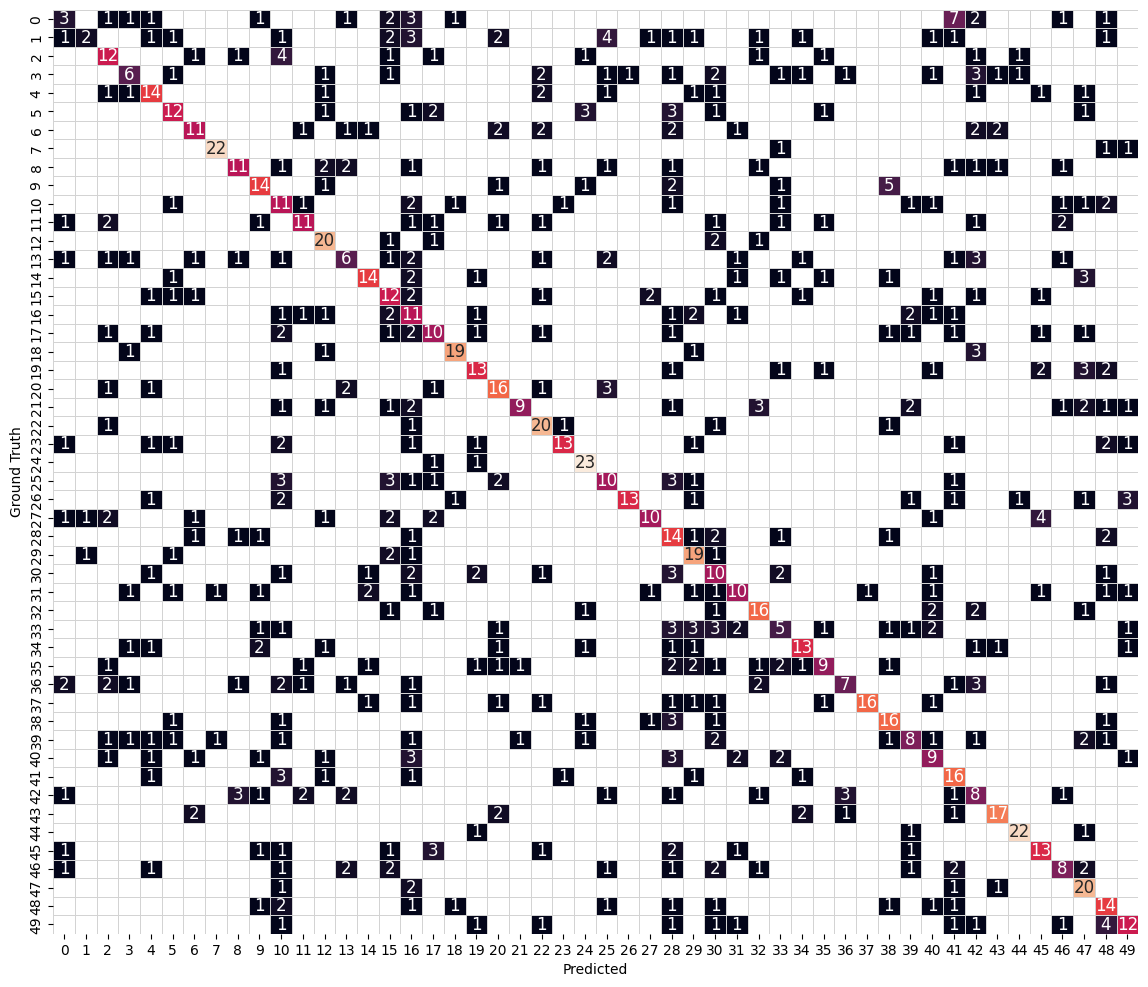

In [20]:
from helpers import plot_confusion_matrix

plot_confusion_matrix(pred, truth)